# ANN

In [ ]:
from google.colab import drive
drive.mount('/content/drive')

Drive already mounted at /content/drive; to attempt to forcibly remount, call drive.mount("/content/drive", force_remount=True).


In [ ]:
cd /content/drive/My Drive/Colab Notebooks

/content/drive/My Drive/Colab Notebooks


In [ ]:
from keras.models import Sequential
from keras.layers.core import Activation
from keras.layers.core import Flatten
from keras.layers.core import Dense
from tensorflow.keras.optimizers import Adam
from sklearn.preprocessing import LabelBinarizer
from sklearn.model_selection import train_test_split
from sklearn.metrics import classification_report
from PIL import Image
from PIL import ImageFilter
from imutils import paths
import numpy as np
import os

In [ ]:
# grab all image paths in the input dataset directory, then initialize
# our list of images and corresponding class labels
print("[INFO] loading images...")
imagePaths = paths.list_images("Data Cocoa Ripe")
data = []
labels = []

[INFO] loading images...


In [ ]:
for imagePath in imagePaths:
  image=Image.open(imagePath)
  image=image.filter(ImageFilter.SMOOTH)
  image = image.filter(ImageFilter.SMOOTH_MORE)
  image=np.array(image.resize((64,64))) / 255.0
  data.append(image)
  label=imagePath.split(os.path.sep)[-2]
  labels.append(label)

In [ ]:
print(labels)

['Mature', 'Mature', 'Mature', 'Mature', 'Mature', 'Mature', 'Mature', 'Mature', 'Mature', 'Mature', 'Mature', 'Mature', 'Mature', 'Mature', 'Mature', 'Mature', 'Mature', 'Mature', 'Mature', 'Mature', 'Mature', 'Mature', 'Mature', 'Mature', 'Mature', 'Mature', 'Mature', 'Mature', 'Mature', 'Mature', 'Mature', 'Mature', 'Mature', 'Mature', 'Mature', 'Mature', 'Mature', 'Mature', 'Mature', 'Mature', 'Mature', 'Mature', 'Mature', 'Mature', 'Mature', 'Mature', 'Mature', 'Mature', 'Mature', 'Mature', 'Mature', 'Mature', 'Mature', 'Mature', 'Mature', 'Mature', 'Mature', 'Mature', 'Mature', 'Mature', 'Mature', 'Mature', 'Mature', 'Mature', 'Mature', 'Mature', 'Mature', 'Mature', 'Mature', 'Mature', 'Mature', 'Imature', 'Imature', 'Imature', 'Imature', 'Imature', 'Imature', 'Imature', 'Imature', 'Imature', 'Imature', 'Imature', 'Imature', 'Imature', 'Imature', 'Imature', 'Imature', 'Imature', 'Imature', 'Imature', 'Imature', 'Imature', 'Imature', 'Imature', 'Imature', 'Imature', 'Imature', 'Im

In [ ]:
# encode the labels, converting them from strings to integers
lb = LabelBinarizer()
labels = lb.fit_transform(labels)

In [ ]:
print(labels)

[[0 1 0]
 [0 1 0]
 [0 1 0]
 [0 1 0]
 [0 1 0]
 [0 1 0]
 [0 1 0]
 [0 1 0]
 [0 1 0]
 [0 1 0]
 [0 1 0]
 [0 1 0]
 [0 1 0]
 [0 1 0]
 [0 1 0]
 [0 1 0]
 [0 1 0]
 [0 1 0]
 [0 1 0]
 [0 1 0]
 [0 1 0]
 [0 1 0]
 [0 1 0]
 [0 1 0]
 [0 1 0]
 [0 1 0]
 [0 1 0]
 [0 1 0]
 [0 1 0]
 [0 1 0]
 [0 1 0]
 [0 1 0]
 [0 1 0]
 [0 1 0]
 [0 1 0]
 [0 1 0]
 [0 1 0]
 [0 1 0]
 [0 1 0]
 [0 1 0]
 [0 1 0]
 [0 1 0]
 [0 1 0]
 [0 1 0]
 [0 1 0]
 [0 1 0]
 [0 1 0]
 [0 1 0]
 [0 1 0]
 [0 1 0]
 [0 1 0]
 [0 1 0]
 [0 1 0]
 [0 1 0]
 [0 1 0]
 [0 1 0]
 [0 1 0]
 [0 1 0]
 [0 1 0]
 [0 1 0]
 [0 1 0]
 [0 1 0]
 [0 1 0]
 [0 1 0]
 [0 1 0]
 [0 1 0]
 [0 1 0]
 [0 1 0]
 [0 1 0]
 [0 1 0]
 [0 1 0]
 [1 0 0]
 [1 0 0]
 [1 0 0]
 [1 0 0]
 [1 0 0]
 [1 0 0]
 [1 0 0]
 [1 0 0]
 [1 0 0]
 [1 0 0]
 [1 0 0]
 [1 0 0]
 [1 0 0]
 [1 0 0]
 [1 0 0]
 [1 0 0]
 [1 0 0]
 [1 0 0]
 [1 0 0]
 [1 0 0]
 [1 0 0]
 [1 0 0]
 [1 0 0]
 [1 0 0]
 [1 0 0]
 [1 0 0]
 [1 0 0]
 [1 0 0]
 [1 0 0]
 [1 0 0]
 [1 0 0]
 [1 0 0]
 [1 0 0]
 [1 0 0]
 [1 0 0]
 [1 0 0]
 [1 0 0]
 [1 0 0]
 [1 0 0]
 [1 0 0]
 

In [ ]:
print(np.array(data).shape)

(213, 64, 64, 3)


In [ ]:
# perform a training and testing split, using 75% of the data for
# training and 25% for evaluation
(trainX, testX, trainY, testY) = train_test_split(np.array(data),	np.array(labels), test_size=0.15)
print(trainX.shape)
print(testX.shape)

(181, 64, 64, 3)
(32, 64, 64, 3)


In [ ]:
trainX = trainX.reshape(181,3*64*64)
testX = testX.reshape(32,3*64*64)

In [ ]:
from keras.models import Sequential
from keras.layers.core import Flatten
from keras.layers.core import Dense, Dropout
#from keras.layers import Conv2D, MaxPooling2D

model = Sequential(
    [
     Flatten(input_shape=(64*64*3,)),
     Dense(100, activation="relu"),
     Dense(100, activation="relu"),
     Dense(50, activation="relu"),
     Dense(3, activation="softmax"),
    ]
)

In [ ]:
model.summary()

Model: "sequential_1"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 flatten_1 (Flatten)         (None, 12288)             0         
                                                                 
 dense_4 (Dense)             (None, 100)               1228900   
                                                                 
 dense_5 (Dense)             (None, 100)               10100     
                                                                 
 dense_6 (Dense)             (None, 50)                5050      
                                                                 
 dense_7 (Dense)             (None, 3)                 153       
                                                                 
Total params: 1,244,203
Trainable params: 1,244,203
Non-trainable params: 0
_________________________________________________________________


In [ ]:
# train the model using the Adam optimizer
print("[INFO] training network...")
opt = Adam(lr=1e-3, decay=1e-3)
model.compile(loss="categorical_crossentropy", optimizer=opt, metrics=["accuracy"])
H = model.fit(trainX, trainY, validation_data=(testX, testY), epochs=100, batch_size=32)

[INFO] training network...
Epoch 1/100


/usr/local/lib/python3.7/dist-packages/keras/optimizer_v2/adam.py:105: UserWarning: The `lr` argument is deprecated, use `learning_rate` instead.
  super(Adam, self).__init__(name, **kwargs)


6/6 [==============================] - 1s 50ms/step - loss: 1.7334 - accuracy: 0.3536 - val_loss: 1.2975 - val_accuracy: 0.4062
Epoch 2/100
6/6 [==============================] - 0s 17ms/step - loss: 0.9904 - accuracy: 0.4972 - val_loss: 0.9853 - val_accuracy: 0.2188
Epoch 3/100
6/6 [==============================] - 0s 13ms/step - loss: 0.9421 - accuracy: 0.5138 - val_loss: 0.9620 - val_accuracy: 0.4688
Epoch 4/100
6/6 [==============================] - 0s 18ms/step - loss: 0.7811 - accuracy: 0.5801 - val_loss: 0.6061 - val_accuracy: 0.7188
Epoch 5/100
6/6 [==============================] - 0s 17ms/step - loss: 0.6518 - accuracy: 0.6630 - val_loss: 0.5428 - val_accuracy: 0.7500
Epoch 6/100
6/6 [==============================] - 0s 15ms/step - loss: 0.6220 - accuracy: 0.6961 - val_loss: 0.8112 - val_accuracy: 0.4688
Epoch 7/100
6/6 [==============================] - 0s 16ms/step - loss: 0.6752 - accuracy: 0.6630 - val_loss: 0.5411 - val_accuracy: 0.7500
Epoch 8/100
6/6 [===============

dict_keys(['loss', 'accuracy', 'val_loss', 'val_accuracy'])


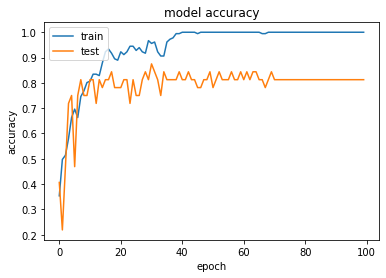

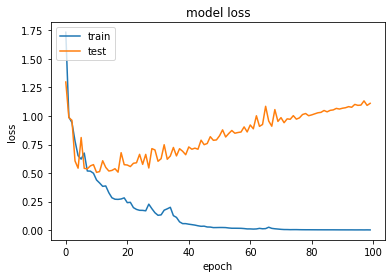

In [ ]:
import matplotlib.pyplot as plt

print(H.history.keys())
# summarize history for accuracy
plt.plot(H.history['accuracy'])
plt.plot(H.history['val_accuracy'])
plt.title('model accuracy')
plt.ylabel('accuracy')
plt.xlabel('epoch')
plt.legend(['train', 'test'], loc='upper left')
plt.show()
# summarize history for loss
plt.plot(H.history['loss'])
plt.plot(H.history['val_loss'])
plt.title('model loss')
plt.ylabel('loss')
plt.xlabel('epoch')
plt.legend(['train', 'test'], loc='upper left')
plt.show()

In [ ]:
# evaluate the network
print("[INFO] evaluating network...")
predictions = model.predict(testX, batch_size=32)
print(classification_report(testY.argmax(axis=1),predictions.argmax(axis=1), target_names=lb.classes_))

[INFO] evaluating network...
              precision    recall  f1-score   support

     Imature       0.86      1.00      0.92        12
      Mature       0.60      0.43      0.50         7
  OverMature       0.85      0.85      0.85        13

    accuracy                           0.81        32
   macro avg       0.77      0.76      0.76        32
weighted avg       0.80      0.81      0.80        32



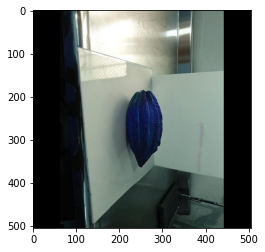

In [ ]:
import cv2
import matplotlib.pyplot as plt

gambar = 'Salinan S5.jpg'
image = cv2.imread(gambar)
plt.imshow(image)
plt.show()

In [ ]:
image_test=Image.open(gambar)
image_test=np.array(image_test.resize((64,64))) / 255.0
image_test.shape

(64, 64, 3)

In [ ]:
image_test=np.expand_dims(image_test, axis=0)
image_test.shape

(1, 64, 64, 3)

In [ ]:
image_test = image_test.reshape(1 ,3*64*64)

In [ ]:
predict = model.predict(image_test)
print(predict)

[[7.9784343e-07 9.0738946e-01 9.2609741e-02]]


In [ ]:
print(lb.classes_[predict.argmax(axis=1)])

['Mature']
